In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

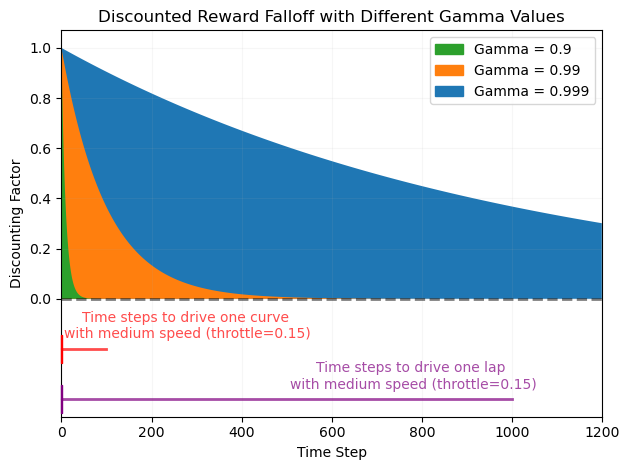

In [6]:
time_steps = 1200
gammas = [0.9, 0.99 , 0.999] 
gamma_values = [gamma ** np.arange(time_steps) for gamma in gammas[::-1]]

fig, ax = plt.subplots()

for i, gamma in enumerate(gammas):
    ax.fill_between(np.arange(time_steps), 0, gamma_values[i]) # , label=f"Gamma = {gamma}"

ax.set_xlabel('Time Step')
ax.set_ylabel('Discounting Factor')
ax.set_title('Discounted Reward Falloff with Different Gamma Values')

# remove negative y-ticks
plt.yticks(np.arange(0, 1.1, 0.2))

plt.xlim(0, time_steps)

# horizontal lines
ax.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.5)
ax.axhline(y=-0.2, xmin=0, xmax=0.1/1.2, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax.axhline(y=-0.4, xmin=0, xmax=1/1.2, color='purple', linestyle='-', linewidth=2, alpha=0.7)

# Adding tips to the axhlines
ax.annotate('', xy=(0.1/1.2, -0.2), xytext=(1/1.2, -0.2), arrowprops=dict(arrowstyle='|-|', color='red', linewidth=1))
ax.annotate('', xy=(1/1.2, -0.4), xytext=(0.1/1.2, -0.4), arrowprops=dict(arrowstyle='|-|', color='purple', linewidth=1))

# text above the lines
ax.text(280, -0.11, 'Time steps to drive one curve \nwith medium speed (throttle=0.15)', ha='center', va='center', fontsize=10, color='red', alpha=0.7)
ax.text(780, -0.31, 'Time steps to drive one lap \nwith medium speed (throttle=0.15)', ha='center', va='center', fontsize=10, color='purple', alpha=0.7)

ax.grid(True, alpha=0.1)

# add handles so that the gamma values are ordered from 0.9 to 0.999 in the legend (reverse order of plotting)
legend_handles = [
    mpatches.Patch(color="tab:green", label="Gamma = 0.9"),
    mpatches.Patch(color="tab:orange", label="Gamma = 0.99"),
    mpatches.Patch(color="tab:blue", label="Gamma = 0.999")
]

ax.legend(handles=legend_handles)

plt.tight_layout()
plt.savefig("../figs/DiscountedRewardFalloff.pdf")  
plt.show()